In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

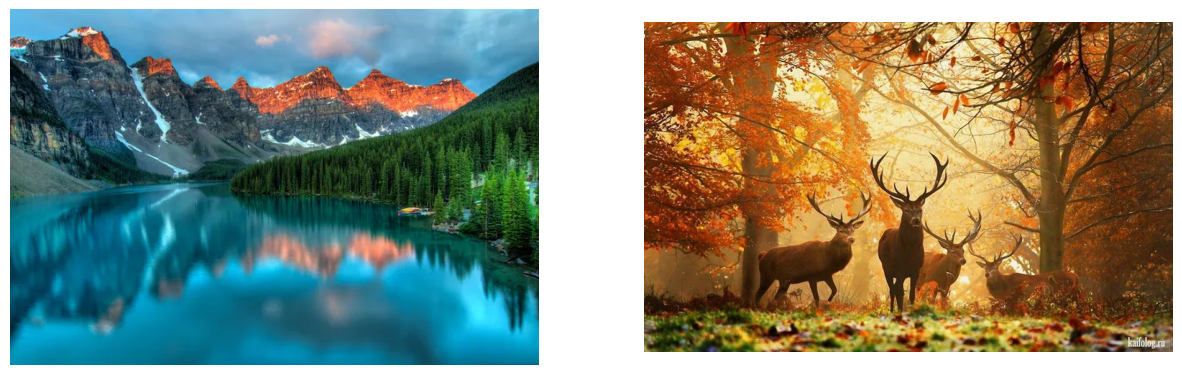

In [40]:
image_1 = plt.imread('1.jpg')
image_2 = plt.imread('2.jpg')
def show_img(img1, img2):
  plt.figure(figsize=(15, 10))
  plt.subplot(1, 2, 1)
  plt.axis('off')
  plt.imshow(img1)
  plt.subplot(1, 2, 2)
  plt.axis('off')
  plt.imshow(img2)

show_img(image_1, image_2)

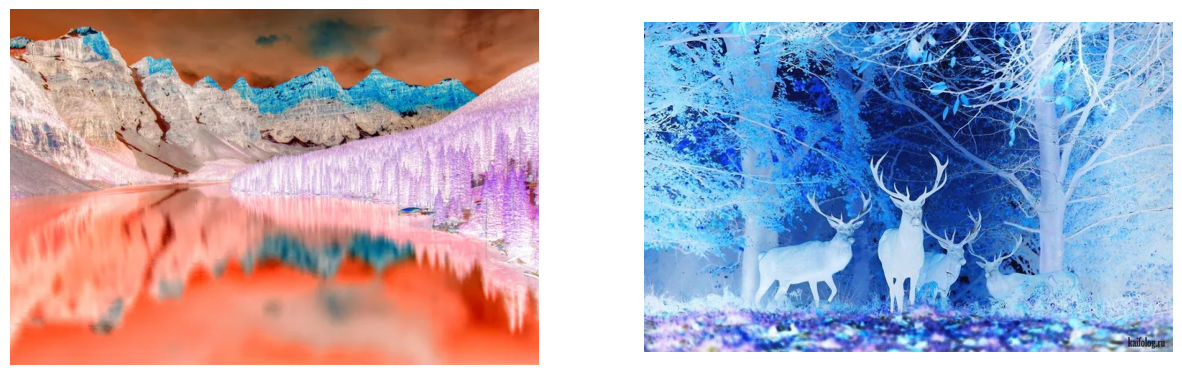

In [41]:
# inversion
# 255 - img
cop_image_1 = image_1.copy()
cop_image_2 = image_2.copy()

def inversion(img):

  shp_img = img.shape
  flat_arr = img.ravel()
  for i in range(len(flat_arr)):
    flat_arr[i] = 255 - flat_arr[i]
  new_img = flat_arr.reshape(shp_img)
  return new_img

inverted_img_1 = inversion(cop_image_1)
inverted_img_2 = inversion(cop_image_2)

show_img(inverted_img_1, inverted_img_2)

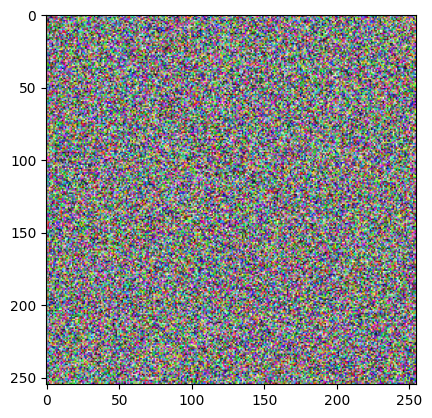

In [42]:
image1 = np.random.rand(255, 255, 3)
plt.imshow(image1)

In [2]:
df = pd.read_csv('train.csv')
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.groupby('Pclass').size()

# df.groupby('Pclass').agg({'Pclass': 'size'})


Pclass
1    216
2    184
3    491
dtype: int64

In [28]:

df.groupby('Pclass')['Survived'].agg('sum')

# df[['Survived', 'Pclass']].groupby('Pclass').agg(lambda x: (x == 0).sum())
# df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass'>

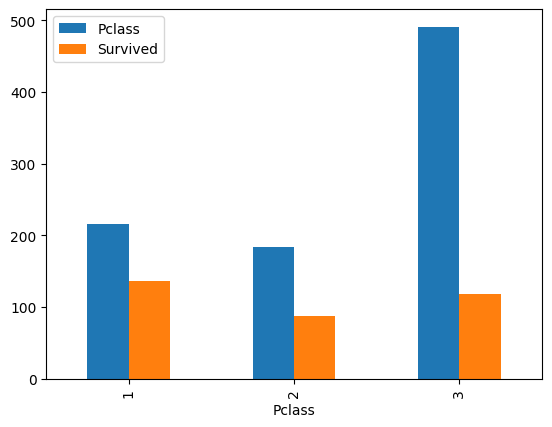

In [24]:
df[['Survived', 'Pclass']].groupby('Pclass').agg({'Pclass': 'size', 'Survived': 'sum'}).plot.bar()
# общее количество людей по классам кают и общее количество выживших по классам кают

<Axes: xlabel='Survived'>

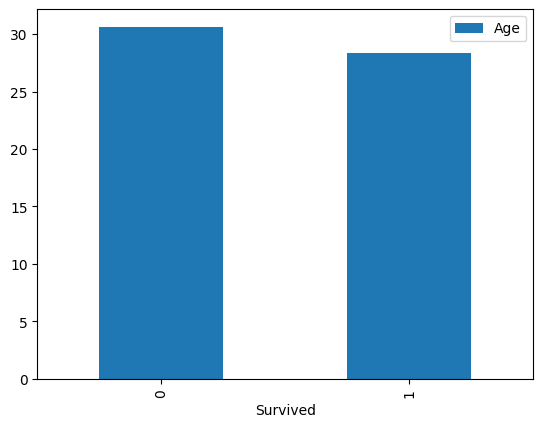

In [22]:
df[['Survived', 'Age']].groupby('Survived').agg({'Age': 'mean'}).plot.bar()
# Срелний возраст выживших и погибших

In [23]:
df[['Survived', 'Fare']].groupby('Survived').agg('mean')
# средняя цена билета вышивших и погибших

,Fare
Survived,
0,22.117887
1,48.395408


<Axes: xlabel='Sex'>

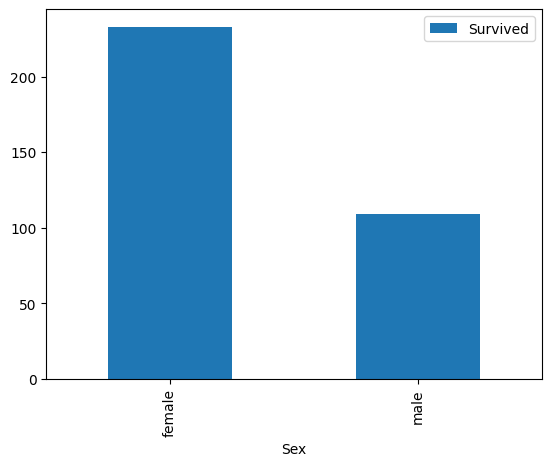

In [31]:
df[['Survived', 'Sex']].groupby('Sex').agg('sum').plot.bar()
# количество выживших по половому признаку

In [50]:
def get_last_name(name_str, num):
    return name_str.split(',')[num]

In [ ]:
df.insert(4, 'LastName', df['Name'].apply(get_last_name))

In [63]:
df['Name'] = df['Name'].apply(get_last_name, num=1)
df

,PassengerId,Survived,Pclass,Name,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev. Juozas,Montvila,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss. Margaret Edith,Graham,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Miss. Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr. Karl Howell,Behr,male,26.0,0,0,111369,30.0000,C148,C
